In [1]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import seaborn as sns

from matplotlib.ticker import FormatStrFormatter

In [2]:
from ExploratoryAnalysis import ExploratoryAnalysis

### Load the dataset

In [3]:
dataset_paysim = pd.read_csv("../data/paysim_dataset.csv")

### Dataset shape

In [4]:
dataset_paysim.shape

(6362620, 11)

### Dataset overview

In [5]:
dataset_paysim.head()

,step,type,amount,nameOrig,oldbalanceOrg,newbalanceOrig,nameDest,oldbalanceDest,newbalanceDest,isFraud,isFlaggedFraud
0,1,PAYMENT,9839.64,C1231006815,170136.0,160296.36,M1979787155,0.0,0.0,0,0
1,1,PAYMENT,1864.28,C1666544295,21249.0,19384.72,M2044282225,0.0,0.0,0,0
2,1,TRANSFER,181.00,C1305486145,181.0,0.00,C553264065,0.0,0.0,1,0
3,1,CASH_OUT,181.00,C840083671,181.0,0.00,C38997010,21182.0,0.0,1,0
4,1,PAYMENT,11668.14,C2048537720,41554.0,29885.86,M1230701703,0.0,0.0,0,0


### Nodes (entities) in the dataset

In [6]:
dataset_paysim[["nameOrig", "nameDest"]].head()

,nameOrig,nameDest
0,C1231006815,M1979787155
1,C1666544295,M2044282225
2,C1305486145,C553264065
3,C840083671,C38997010
4,C2048537720,M1230701703


In [7]:
estimated_number_of_nodes = len(dataset_paysim) * 2 - dataset_paysim["nameOrig"].duplicated().sum() - dataset_paysim["nameDest"].duplicated().sum()

print("Estimated number of unique nodes: %d" % estimated_number_of_nodes)
print("The number is estimated, as after merging values of two columns, there may be duplicates in the newly created column.")

Estimated number of unique nodes: 9075669
The number is estimated, as after merging values of two columns, there may be duplicates in the newly created column.


In [8]:
eda = ExploratoryAnalysis(dataset_paysim, "isFraud", "nameOrig", "nameDest", "step")

In [9]:
unique_nodes = eda.getUniqueNodes()
print(len(unique_nodes))

9073900


In [10]:
eda.getNumberOfEdges()

6362620

In [11]:
eda.getMissingValues()

step              0
type              0
amount            0
nameOrig          0
oldbalanceOrg     0
newbalanceOrig    0
nameDest          0
oldbalanceDest    0
newbalanceDest    0
isFraud           0
isFlaggedFraud    0
dtype: int64

In [12]:
eda.getDatasetOverview()

,step,type,amount,nameOrig,oldbalanceOrg,newbalanceOrig,nameDest,oldbalanceDest,newbalanceDest,isFraud,isFlaggedFraud
0,1,PAYMENT,9839.64,C1231006815,170136.0,160296.36,M1979787155,0.0,0.0,0,0
1,1,PAYMENT,1864.28,C1666544295,21249.0,19384.72,M2044282225,0.0,0.0,0,0
2,1,TRANSFER,181.00,C1305486145,181.0,0.00,C553264065,0.0,0.0,1,0
3,1,CASH_OUT,181.00,C840083671,181.0,0.00,C38997010,21182.0,0.0,1,0
4,1,PAYMENT,11668.14,C2048537720,41554.0,29885.86,M1230701703,0.0,0.0,0,0


In [13]:
eda.getNumberOfTransactionClasses()

2

In [14]:
eda.getTransactionClassesValues()

array([0, 1])

In [15]:
eda.getTransactionClassesDistribution()

0    6354407
1       8213
Name: isFraud, dtype: int64

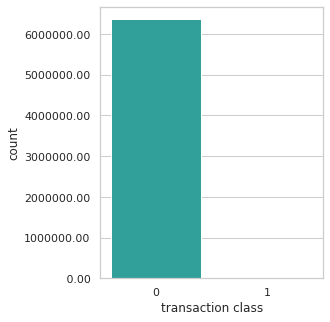

In [16]:
plt.figure(figsize=(4,5))
sns.set_theme(style="whitegrid")
ax = sns.barplot(x=eda.getTransactionClassesDistribution().index, y=eda.getTransactionClassesDistribution(), color="lightseagreen")
ax.yaxis.set_major_formatter(FormatStrFormatter('%5.2f'))
plt.ylabel("count")
plt.xlabel("transaction class")
plt.show()

In [17]:
eda.getNumberOfTimeSteps()

743

In [18]:
eda.getGraphSizesDistribution()

,TimeStep,Size
0,19,51352
1,18,49579
2,187,49083
3,235,47491
4,307,46968
...,...,...
738,432,4
739,706,4
740,693,4
741,112,2


In [19]:
eda.getFraudDistributionInTimesteps()

,TimeStep,NumberOfFraudulentTransactions
0,212,40
1,523,30
2,387,28
3,425,28
4,249,28
...,...,...
736,202,2
737,589,2
738,112,2
739,548,2


In [20]:
print(f"The number of financial transactions: {dataset_paysim.shape[0]}")
print(f"The number of attributes: {dataset_paysim.shape[1]}")
print(f"The number of unique source accounts: {len(dataset_paysim.nameOrig.unique())}")
print(f"The number of unique destination accounts: {len(dataset_paysim.nameDest.unique())}")

The number of financial transactions: 6362620
The number of attributes: 11
The number of unique source accounts: 6353307
The number of unique destination accounts: 2722362


In [21]:
print("\n-------\tTRANSACTION INFORMATION\t-------\n")
print(f"The most common type of transaction: {str(dataset_paysim.type.mode()).split()[1]}")
print("Transactions - frequencies:")
print(dataset_paysim.type.value_counts())


-------	TRANSACTION INFORMATION	-------

The most common type of transaction: CASH_OUT
Transactions - frequencies:
CASH_OUT    2237500
PAYMENT     2151495
CASH_IN     1399284
TRANSFER     532909
DEBIT         41432
Name: type, dtype: int64


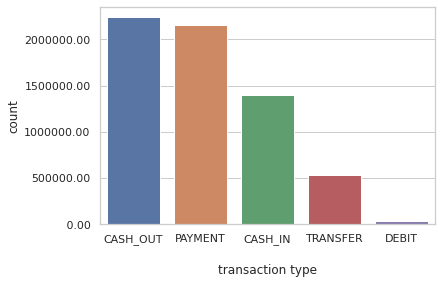

In [22]:
sns.set_theme(style="whitegrid")
ax = sns.barplot(x=dataset_paysim.type.value_counts().index, y=dataset_paysim.type.value_counts())
ax.yaxis.set_major_formatter(FormatStrFormatter('%5.2f'))
plt.xlabel("\ntransaction type")
plt.ylabel("count")
plt.show()

In [23]:
print("\n-------\tAMOUNTS INFORMATION\t-------\n")
print(f"Maximal transaction amount: {dataset_paysim.amount.max()}")
print(f"Minimal transaction amount: {dataset_paysim.amount.min()}")
print(f"Mean for the transaction amount: {dataset_paysim.amount.mean()}")
print(f"Median for the transaction amount: {dataset_paysim.amount.median()}")
print(f"Standard deviation of the transaction amount: {dataset_paysim.amount.std()}")


-------	AMOUNTS INFORMATION	-------

Maximal transaction amount: 92445516.64
Minimal transaction amount: 0.0
Mean for the transaction amount: 179861.90354913071
Median for the transaction amount: 74871.94
Standard deviation of the transaction amount: 603858.2314629358


In [24]:
def getCountsDataFrame(attribute):
    vc_df = pd.DataFrame(attribute.value_counts())
    vc_df.columns = ["count"]
    vc_df = vc_df.reset_index()
    return vc_df

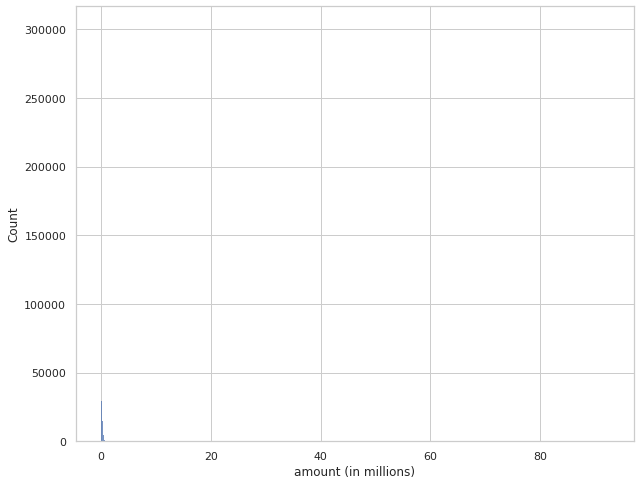

In [25]:
plt.figure(figsize=(10,8))
sns.histplot(dataset_paysim.amount / 1_000_000)
plt.xlabel("amount (in millions)")
plt.savefig("../visualizations/distribution_amounts.png")
plt.show()

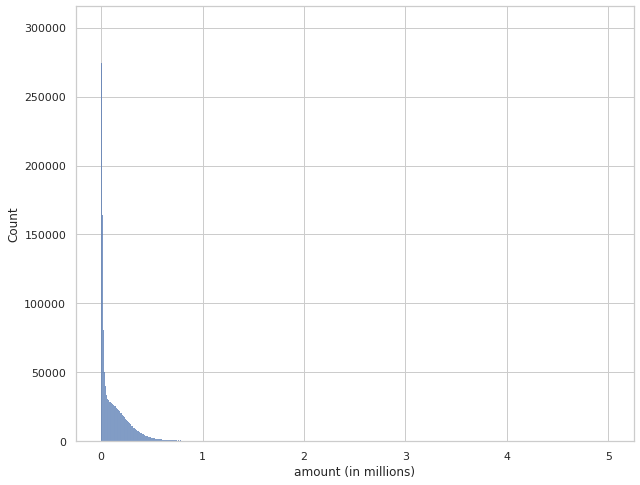

In [26]:
plt.figure(figsize=(10,8))
sns.histplot(dataset_paysim[dataset_paysim.amount < 5_000_000]["amount"] / 1_000_000)
plt.xlabel("amount (in millions)")
plt.savefig("../visualizations/distribution_amounts_lower_than_5000000.png")
plt.show()

In [27]:
len(dataset_paysim[dataset_paysim.amount < 5_000_000])

6351105

In [28]:
len(dataset_paysim[dataset_paysim.amount >= 5_000_000])

11515

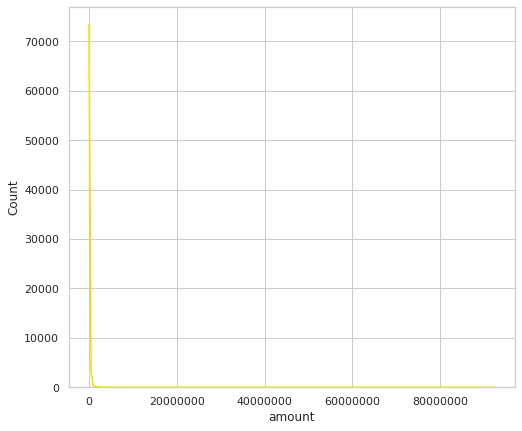

In [29]:
plt.figure(figsize=(8,7))
ax = sns.histplot(dataset_paysim.amount.replace(to_replace=0.0, value=0.0001),
                 color="gold",
                 kde=True,
                 stat="count",
                 linewidth=0)
ax.containers[0].remove()  # remove the bars
ax.relim()  # the axis limits need to be recalculated without the bars
ax.autoscale_view()
ax.xaxis.set_major_formatter(FormatStrFormatter("%d"))
ax.yaxis.set_major_formatter(FormatStrFormatter("%d"))
plt.show()

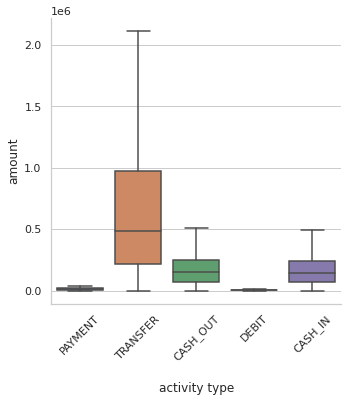

In [30]:
sns.set_theme(style="whitegrid")
plt.rcParams['figure.figsize']=(10,10)
sns.catplot(x="type", y="amount", data=dataset_paysim, showfliers=False, kind="box")
plt.xticks(rotation=45)
plt.xlabel("\nactivity type")
plt.savefig("../visualizations/categories_amounts.png")
plt.show()

In [31]:
print("\n-------\tFRAUDULENT TRANSACTIONS INFORMATION\t-------\n")
print(f"The number of fraudulent transactions: {len(dataset_paysim[dataset_paysim.isFraud == 1])}")
print(f"The fraction of transaction which are fraudulent: {round(len(dataset_paysim[dataset_paysim.isFraud == 1])/len(dataset_paysim), 4)}")
print(f"The number of flagged transactions: {len(dataset_paysim[dataset_paysim.isFlaggedFraud == 1])}")
print(f"The proportion of flagged transactions to fraudulent transactions: {round(len(dataset_paysim[dataset_paysim.isFlaggedFraud == 1])/len(dataset_paysim[dataset_paysim.isFraud == 1]), 4)}")
print(f"The mean amount for fraudulent transactions: {round(dataset_paysim[dataset_paysim.isFraud == 1]['amount'].mean(), 2)}")
print(f"The median amount for fraudulent transactions: {round(dataset_paysim[dataset_paysim.isFraud == 1]['amount'].median(), 2)}")
print("To be compared with non-fraudulent transactions:")
print(f"The median amount for non-fraudulent transactions: {round(dataset_paysim[dataset_paysim.isFraud == 0]['amount'].median(), 2)}")


-------	FRAUDULENT TRANSACTIONS INFORMATION	-------

The number of fraudulent transactions: 8213
The fraction of transaction which are fraudulent: 0.0013
The number of flagged transactions: 16
The proportion of flagged transactions to fraudulent transactions: 0.0019
The mean amount for fraudulent transactions: 1467967.3
The median amount for fraudulent transactions: 441423.44
To be compared with non-fraudulent transactions:
The median amount for non-fraudulent transactions: 74684.72


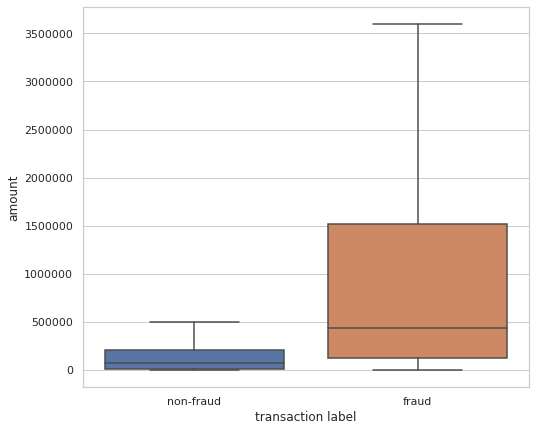

In [32]:
sns.set_theme(style="whitegrid")
plt.figure(figsize=(8,7))
ax = sns.boxplot(x="isFraud", y="amount", data=dataset_paysim, showfliers=False)
ax.yaxis.set_major_formatter(FormatStrFormatter("%d"))
plt.xlabel("transaction label")
plt.xticks([0, 1], ["non-fraud", "fraud"])
plt.show()

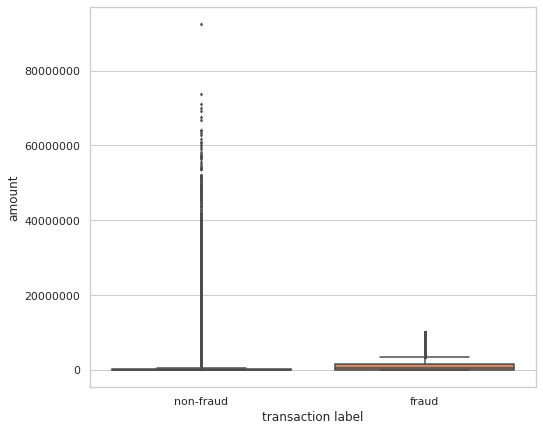

In [33]:
sns.set_theme(style="whitegrid")
plt.figure(figsize=(8,7))
ax = sns.boxplot(x="isFraud", y="amount", data=dataset_paysim, showfliers=True, flierprops = dict(markerfacecolor='b', markersize=2))
ax.yaxis.set_major_formatter(FormatStrFormatter("%d"))
plt.xlabel("transaction label")
plt.xticks([0, 1], ["non-fraud", "fraud"])
plt.show()

In [34]:
def getNumberOfOutliers(subset):
    q25, q75 = np.percentile(subset, q=[25, 75])
    iqr = q75 - q25
    upper_whisker = q75 + 1.5 * iqr
    lower_whisker = q25 - 1.5 * iqr
    return np.sum(subset > upper_whisker), np.sum(subset < lower_whisker)

In [35]:
print("Amounts related to financial activity:\n")
print("Outliers: entire data set")
print(getNumberOfOutliers(dataset_paysim["amount"])[0])
print("Outliers: fraudulent activity")
print(getNumberOfOutliers(dataset_paysim[dataset_paysim["isFraud"] == 1]["amount"])[0])
print("Outliers: non-fraudulent activity")
print(getNumberOfOutliers(dataset_paysim[dataset_paysim["isFraud"] == 0]["amount"])[0])

Amounts related to financial activity:

Outliers: entire data set
338078
Outliers: fraudulent activity
998
Outliers: non-fraudulent activity
335347


In [36]:
grouped = dataset_paysim.groupby("step")
print(f"The time step with the peak fraudulent transaction number: {grouped.isFraud.apply(sum).idxmax()}")
print(f"The number of fraudulent transactions: {grouped.isFraud.apply(sum).max()}")

The time step with the peak fraudulent transaction number: 212
The number of fraudulent transactions: 40


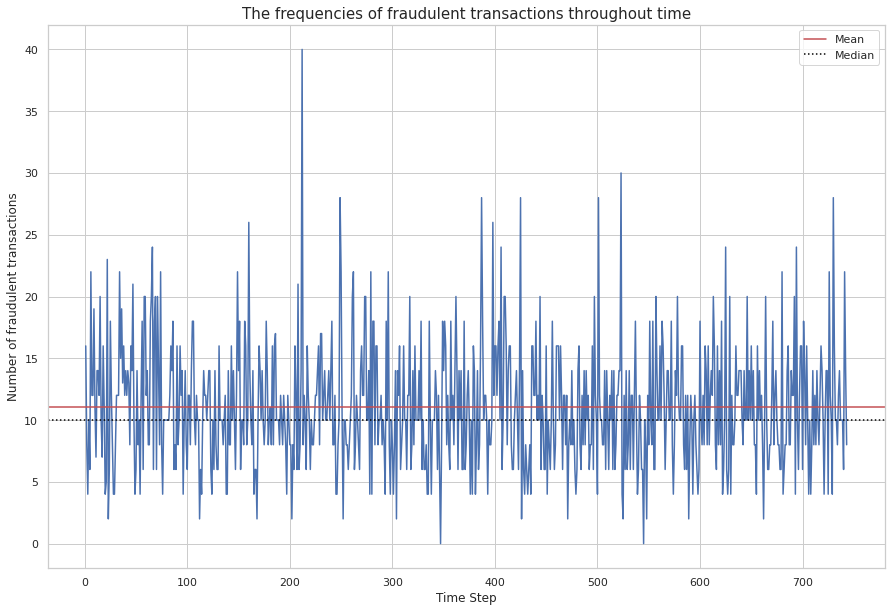

In [37]:
sns.set_theme(style="whitegrid")
plt.figure(figsize=(15,10))
plt.plot(grouped.isFraud.apply(sum))
plt.title("The frequencies of fraudulent transactions throughout time", fontsize=15)

plt.xlabel("Time Step")
plt.ylabel("Number of fraudulent transactions")

plt.axhline(y=np.mean(grouped.isFraud.apply(sum)), label = "Mean", color='r', linestyle='-')
plt.axhline(y=np.median(grouped.isFraud.apply(sum)), label = "Median", color='black', linestyle="dotted")

plt.legend(loc ="upper right")

plt.savefig("Fraudulent_transactions_in_time.PNG")
plt.show()

In [46]:
def plotAmountDistribution(transaction_class_value, limit=None):
    subset = None
    if limit is not None:
        subset = dataset_paysim[(dataset_paysim["isFraud"] == transaction_class_value) & (dataset_paysim["amount"] <= limit)]["amount"] / 1_000_000
    else:
        subset = dataset_paysim[dataset_paysim["isFraud"] == transaction_class_value]["amount"] / 1_000_000
    sns.set_theme(style="whitegrid")
    plt.figure(figsize=(8,10))
    ax = sns.histplot(subset,
                 color="gold",
                 kde=False,
                 stat="count",
                 linewidth=0)

    ax.xaxis.set_major_formatter(FormatStrFormatter('%.3f'))

    ax.set_xlabel("amount (in millions)", fontsize=12)
    ax.set_ylabel("count", fontsize=12)
    #ax.set_title(f"Distribution for transaction amounts of transaction class: {transaction_class_value}", fontsize=14)
    plt.xticks(rotation=45)
    plt.savefig(f"../visualizations/distribution_of_amounts_class{transaction_class_value}.png")
    plt.show()

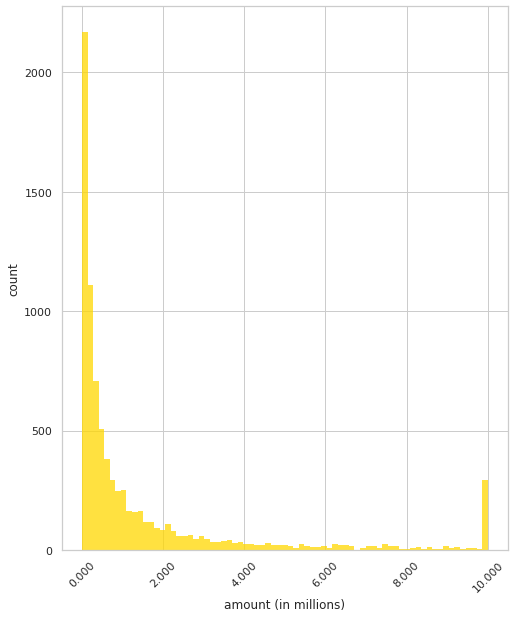

In [47]:
plotAmountDistribution(1, limit=None)

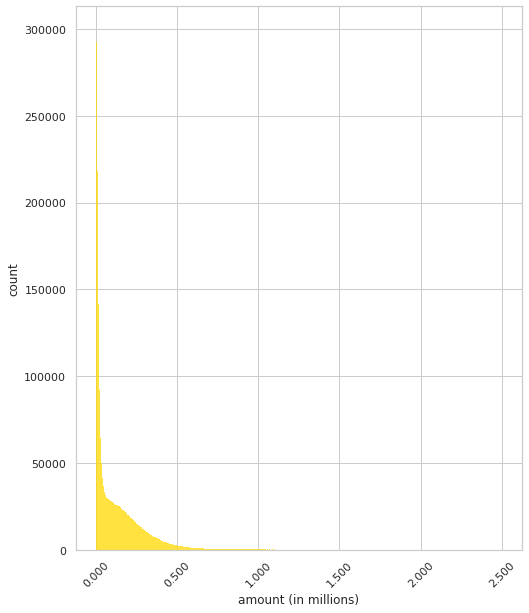

In [48]:
plotAmountDistribution(0, limit=2500000)

In [41]:
transaction_categories = pd.DataFrame(dataset_paysim.groupby("type")["isFraud"].value_counts())
transaction_categories.columns = ["count"]
transaction_categories = transaction_categories.reset_index()
transaction_categories

,type,isFraud,count
0,CASH_IN,0,1399284
1,CASH_OUT,0,2233384
2,CASH_OUT,1,4116
3,DEBIT,0,41432
4,PAYMENT,0,2151495
5,TRANSFER,0,528812
6,TRANSFER,1,4097


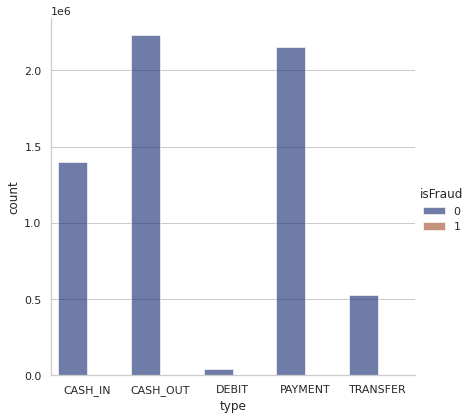

In [42]:
sns.catplot(data=transaction_categories, kind="bar", x="type", y="count", hue="isFraud", ci="sd", palette="dark", alpha=.6, height=6)
plt.show()